In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
dataset = pd.read_csv("/content/Iris.csv")

#### Let have a look on the data

In [ ]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
dataset['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Clearly data is clean, it does not contain any NULL values and as desired, it have 3 distinct classes 

In [ ]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


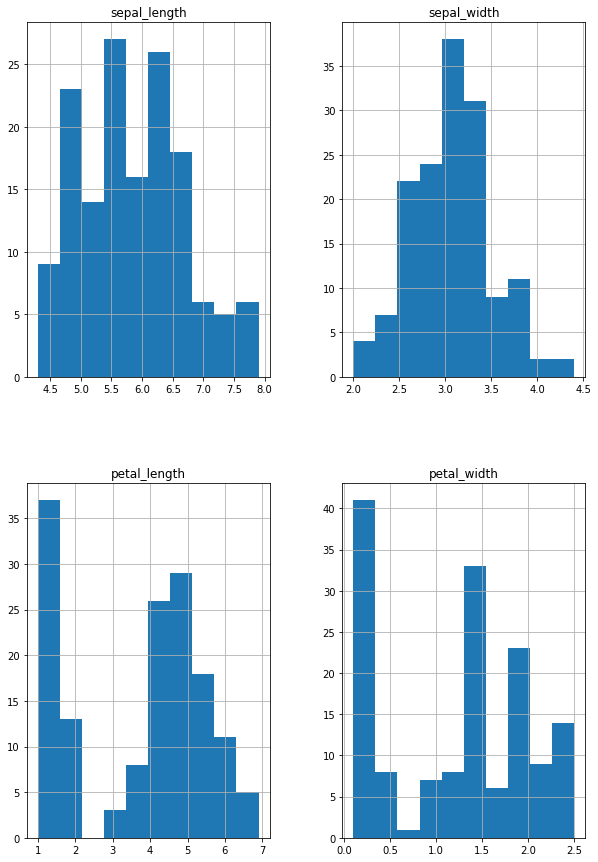

In [ ]:
dataset.hist(figsize=(10,15))
plt.show()

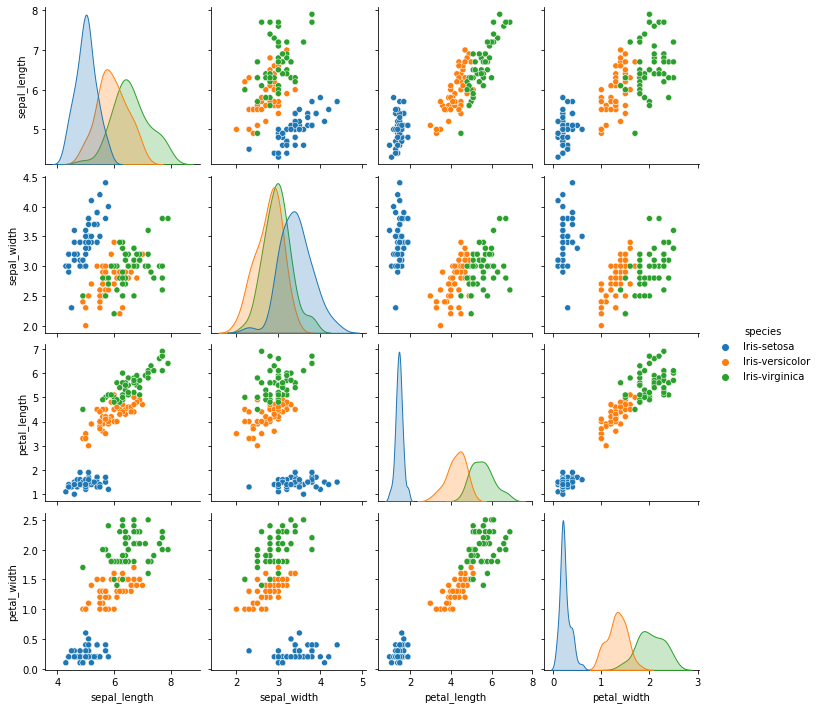

In [ ]:
sns.pairplot(dataset, hue="species")

#### From the above pairplots, it seems that Iris-setosa postion vectors are located closely, but quiet distinct from other two classes while Iris-versicolor & virginica are more close to each other 

### Standardise the data

In [ ]:
X = dataset.drop('species',axis =1)
Y= dataset["species"]

In [ ]:
# Let Standardize the data, it helps to ease calculations
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

## Question 1:
<p> Need to build 3 classifiers & use 1-NN to classify the data</p>
<h3> Approach</h3>
<ul> <li> Lets first label encode the Iris -setosa as 0 & both Iris-Versicolor & Iris- Virginica as 1, so as a result two classes will be formed</li>
<li>Then apply 1-NN to classify the data points and store the results </li>
<li> Now repeat the above steps  but in this case Iris-Versicolor as 0 & other two classes as 1</li>
<li> Similarly repeat the above steps to build third classifier where Iris-Virginica is labeled as 0 &  other two as 1</li>
<li> Finally combine & analyse the results of above 3 classifiers to give final classification </li>
</ul>

#### Split data 

In [ ]:
# Splits the data into training & testing into 70-30 ratio:
X_train, X_test, Y_train, Y_test = train_test_split( X,Y,test_size=0.3, random_state=0)
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 105 samples in the training set and 45 samples in the test set


In [ ]:
# Label Encode the Y_test in the following manner:
list = ['Iris-setosa','Iris-versicolor','Iris-virginica']
new_values = [0,1,2]
Y_test.replace(to_replace =list,value = new_values,inplace =True) # replace() helps to replace the particular value of a column with other values

#### We will use the same X_train , X_test for all classifiers, only Y_train will be manipulated to get the desired the classes as mentioned above

#### Make 1NN model function

In [ ]:
def make_1_NN_model(X_train,Y_train,X_test):

  model = KNeighborsClassifier(n_neighbors=1, p=2)  # p=2 denote 'Eucledian Distance'
  model.fit(X_train, Y_train)
  y_pred = model.predict(X_test)
  return y_pred


### Classifier 1:

In [ ]:
list = ['Iris-setosa','Iris-versicolor','Iris-virginica']
new_values = [0,1,1]
Y1 = Y_train.replace(to_replace=list,value = new_values, inplace = False)

In [ ]:
Y1.unique()

array([1, 0])

In [ ]:
Y1_predicted = make_1_NN_model(X_train,Y1,X_test)

#### Classifier 2:

In [ ]:
list = ['Iris-setosa','Iris-versicolor','Iris-virginica']
new_values = [1,0,1]
Y2 = Y_train.replace(to_replace=list,value = new_values, inplace = False)
Y2.unique()

array([0, 1])

In [ ]:

Y2_predicted = make_1_NN_model(X_train,Y2,X_test)

#### Classifier 3:

In [ ]:
list = ['Iris-setosa','Iris-versicolor','Iris-virginica']
new_values = [1,1,0]
Y3 = Y_train.replace(to_replace=list,value = new_values, inplace = False)
Y3.unique()

array([1, 0])

In [ ]:
Y3_predicted = make_1_NN_model(X_train,Y3,X_test)

In [ ]:
Y3_predicted

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1])

#### Combining the results of 3 classifiers:
<p> As per the classifiers, true class will be one which is labelled as zero among 3 classifiers, so will check which predicted values have 0 for respective test sample & assign that class to a test sample. </p>
<p> Example :<p>
<p> Let take one test sample which is closest to 'Iris-setosa', then classifier 1 will assign '0' label to it, while classifier 2 & 3 will assign '1' to it, so while giving the final result, will take that classifier's result who labelled the sample as '0' like classifier 1 in this case.</p>

In [ ]:
Y_final_prediction=[] # Creating an empty list 
for i in range(len(Y1_predicted)):
  if(Y1_predicted[i]==0):
    Y_final_prediction.append(0)
  elif(Y2_predicted[i]==0):
    Y_final_prediction.append(1)
  else :
    Y_final_prediction.append(2)  


### Accuracy & Observations


In [ ]:
accuracy = accuracy_score(Y_test, Y_final_prediction)
print("Accuracy score of model comes out to be: {0:.4f}".format(accuracy))

Accuracy score of model comes out to be: 0.9556


### Let have a look into confusion matrix

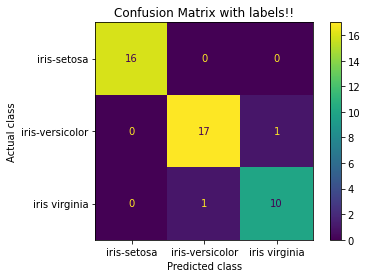

In [ ]:
matrix = confusion_matrix(Y_test,Y_final_prediction)
cmd_obj = ConfusionMatrixDisplay(matrix, display_labels=['iris-setosa', 'iris-versicolor', 'iris virginia'])

cmd_obj.plot()
cmd_obj.ax_.set(
                title='Confusion Matrix with labels!!', 
                xlabel='Predicted class', 
                ylabel='Actual class')
plt.show()

### let have a look into Precision, recall & F1 Score

In [ ]:
print(metrics.classification_report(Y_test, Y_final_prediction, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        16
           1      0.944     0.944     0.944        18
           2      0.909     0.909     0.909        11

    accuracy                          0.956        45
   macro avg      0.951     0.951     0.951        45
weighted avg      0.956     0.956     0.956        45



#### As a result, we got 100% precision for class 1 ('Iris-Setosa'), 94.4% precision for class 2 ('Iris-Versicolor') with one miss-identified as 'Iris-Virginia' & 90.9% precision for class 3 with one miss-identified as 'Iris-Versicolor'. Similar conlcusions can also be made about recall & F1 score from above table

### Question:
#### Calculating Eucledian distance between two rows

In [ ]:
def euclidean_distance(row1, row2):
 distance = 0.0
 for i in range(len(row1)):
   distance += (row1[i] - row2[i])**2
 return (distance)**0.5

#### To classify the test data, distance of each test vector is taken from all trained data vectors, then arrange them based on sorting and the one with smallest distance will be chosen

In [ ]:
# Let label encode the Y_train into 3 categories :
list = ['Iris-setosa','Iris-versicolor','Iris-virginica']
new_values = [0,1,2]
Y_train.replace(to_replace =list,value = new_values,inplace =True) 

In [ ]:
Y_predicted = []  # create empty list which will contain predicted values

for test_row in X_test:
  # for each test row , the distance & label of training data will be stored in 'result' list
  result =[]
  for i,train_row in enumerate(X_train):
    distance = euclidean_distance(train_row, test_row)
    result.append([distance,Y_train.iloc[i]])

  result.sort()  
  Y_predicted.append(result[0][1]) # As 1NN model is used, so top element of sorted list is chosen to determine class.

### Measuring Accuracy

In [ ]:
acc = accuracy_score(Y_test, Y_predicted)
print("Accuracy score comes out to be: {0:.4f}".format(accuracy))

Accuracy score comes out to be: 0.9556


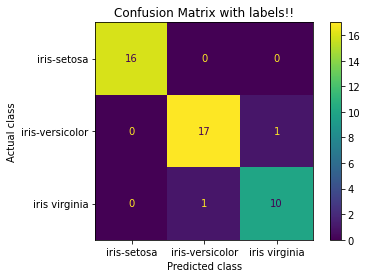

In [ ]:
matrix2 = confusion_matrix(Y_test,Y_predicted) 
cmd_obj = ConfusionMatrixDisplay(matrix2, display_labels=['iris-setosa', 'iris-versicolor', 'iris virginia'])

cmd_obj.plot()
cmd_obj.ax_.set(
                title='Confusion Matrix with labels!!', 
                xlabel='Predicted class', 
                ylabel='Actual class')
plt.show()

In [ ]:
print(metrics.classification_report(Y_test, Y_predicted, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        16
           1      0.944     0.944     0.944        18
           2      0.909     0.909     0.909        11

    accuracy                          0.956        45
   macro avg      0.951     0.951     0.951        45
weighted avg      0.956     0.956     0.956        45



### Observations: 
<p> Clearly from the above accuracy score & confusion matrix, results obtained from both M1 & M2 model are same. In the second case, where we manually calculate the nearest Eucledian Distance without using library, we get exaclty the same precision, recall & f1-score(as can be seen in above table) </p>
  

### Question:

#### Build General KNN model function for multi-classification using one against all approach

In [ ]:
def make_model(k):

  model = KNeighborsClassifier(n_neighbors=k, p=2) # p=2 denote Eucledian Distance 
  model = OneVsRestClassifier(model)
  model.fit(X_train, Y_train)
  y_pred = model.predict(X_test)
  return accuracy_score(Y_test, y_pred),y_pred


In [ ]:
## Let run for k=3 as general case:
acc,y_pred= make_model(3)
print("Accuracy of KNN model for k=3 is : {0:.4f}".format(acc))

Accuracy of KNN model for k=3 is : 0.9778


#### Clearly for k=3 show better acccuracy then the above 1NN model

### Lets try for different value & find optimised one

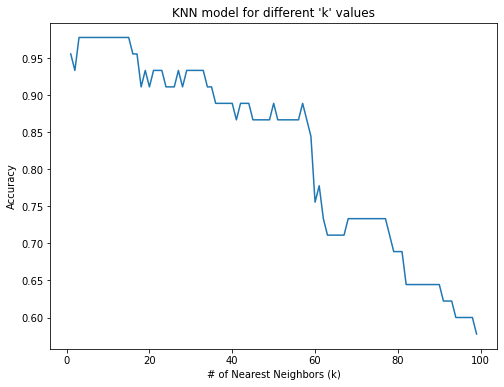

In [ ]:
accuracies = []

for k in range(1,100):
  accuracy,y = make_model(k)
  accuracies.append(accuracy)
    

# Plot the results 

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_title('KNN model for different \'k\' values')
ax.set_ylabel('Accuracy');

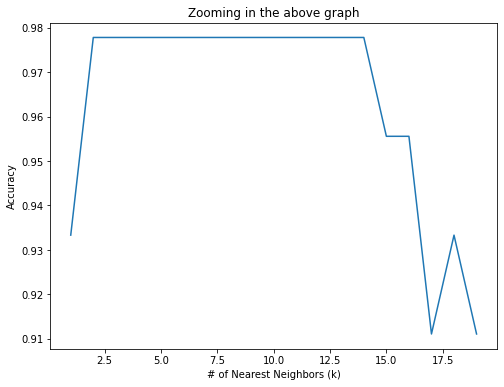

In [ ]:
# Zooming the graph for range k=1 to k=20
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,20), accuracies[1:20])
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_title('Zooming in the above graph')
ax.set_ylabel('Accuracy');

### From the above graph, it is clearly seen that maximum accuracy that can be obtained is 97.78% & this accuracy is given by any k chosen from the range ~ (3-14) (approximately). If one chooses the value of 'k' out of this range, accuracy of KNN model decreases

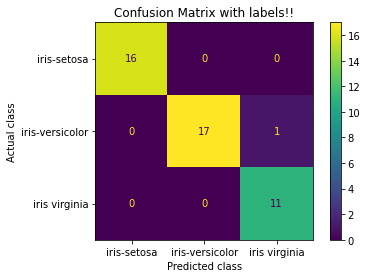

In [ ]:
# Lets the draw the confusion matrix for k=3
matrix3 = confusion_matrix(Y_test,y_pred) 
cmd_obj = ConfusionMatrixDisplay(matrix3, display_labels=['iris-setosa', 'iris-versicolor', 'iris virginia'])

cmd_obj.plot()
cmd_obj.ax_.set(
                title='Confusion Matrix with labels!!', 
                xlabel='Predicted class', 
                ylabel='Actual class')
plt.show()

### Clearly the number of miss-classified sample decreases. 'Iris-Setosa' & 'Iris-Virginia' are predicted 100% accurately, while one 'Iris-Versicolor' sample is miss-classified as 'iris- Virginia' 